# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
import numpy as np
import pandas as pd



# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [8]:
missing_data = sensor.isnull().sum()



if missing_data.any():
    sensor.dropna(inplace=True)



How many rows and columns are in our data?

In [11]:
sensor.info


<bound method DataFrame.info of       attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0          1.528132       -0.733896      0.696372   0.741895   0.669768   
1          1.527992       -0.716987      0.677762   0.753099   0.657116   
2          1.527765       -0.706999      0.670951   0.759611   0.649555   
3          1.516768       -0.704678      0.675735   0.760709   0.647788   
4          1.493941       -0.703918      0.672994   0.760062   0.647210   
...             ...             ...           ...        ...        ...   
1746       1.797120       -0.562324      2.445889   0.824443   0.533154   
1747       1.814297       -0.569719      2.449655   0.817212   0.539396   
1748       1.830821       -0.578367      2.447967   0.809207   0.546658   
1749       1.849557       -0.586962      2.439458   0.800485   0.553834   
1750       1.869375       -0.596783      2.433775   0.790551   0.561984   

      gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [20]:
start = '2018-01-01 00:00:00'
end = '2018-01-01 00:29:10'
num_rows = len(sensor)

time_index = pd.date_range(start=start, end=end, periods = num_rows)

time_index


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [26]:
sensor.index

RangeIndex(start=0, stop=1751, step=1)

In [27]:
sensor.index.freq = pd.infer_freq(time_index)

In [28]:
sensor.index.freq

's'

In [29]:
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Assign the time series index to the dataframe's index.

In [6]:
# Your code here:



Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

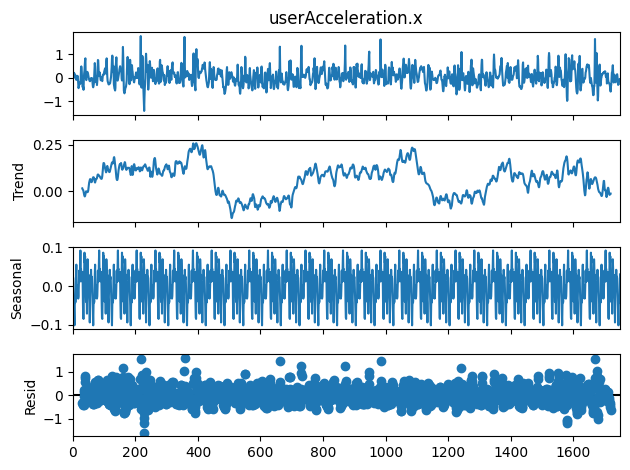

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


result = seasonal_decompose(sensor['userAcceleration.x'], period=60)

result.plot()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

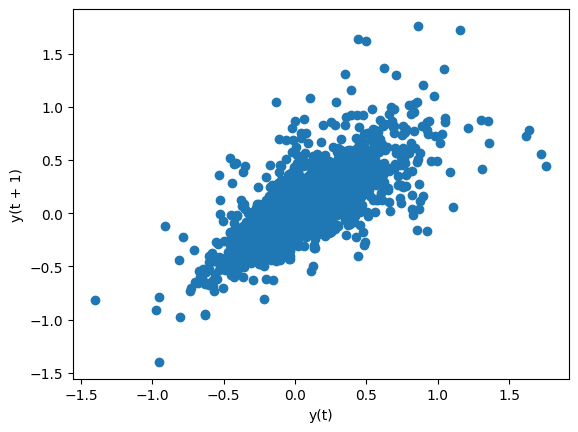

In [38]:
pd.plotting.lag_plot(sensor['userAcceleration.x'])
plt.show()

Create a lag plot for `rotationRate.x`

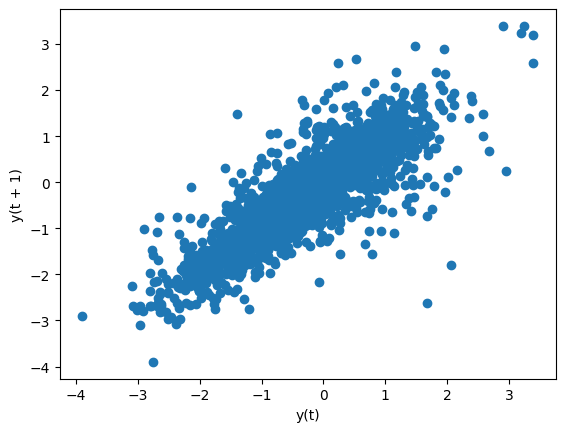

In [39]:
pd.plotting.lag_plot(sensor['rotationRate.x'])
plt.show()


What are your conclusions from both visualizations?

In [40]:
# rotationRate.x is more spread and the correlation is higher than with userAcceleration.x as userAcceleration.x
# is more centered meaning there is a big correlation between y(t) and y(t + 1)


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [42]:
from statsmodels.tsa.stattools import adfuller
def dickey_rejects(series, alpha=0.05):
    p_value = adfuller(series)[1] 
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"

    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"


result_acceleration = dickey_rejects(sensor['userAcceleration.x'])
result_rotation = dickey_rejects(sensor['rotationRate.x'])

print("ADF Test Result for userAcceleration.x:", result_acceleration)
print("ADF Test Result for rotationRate.x:", result_rotation)


ADF Test Result for userAcceleration.x: We reject H0 and accept H1: The series IS stationary
ADF Test Result for rotationRate.x: We reject H0 and accept H1: The series IS stationary


What are your conclusions from this test?

In [13]:
# Your conclusions here:



## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
order = (2, 0, 1)

In [ ]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [ ]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html



In [ ]:
# 2. Fit the model:



In [ ]:
# 3. Predict: create y_pred:


In [ ]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:

# rmse(y_pred, y_test)